<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/EXERCISE/Exercise_Fuzzy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=91135faaba78a12435856cb3fd149f61bcaa698e17cc2bb46846005e8f34641b
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
# Bài 1--------Adaptive Food Suggestion Engine by Fuzzy Logic----------

4.233133635268795


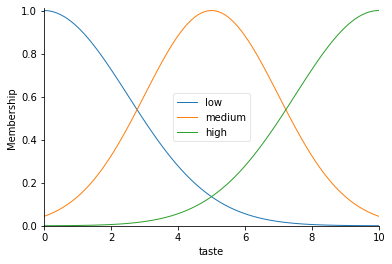

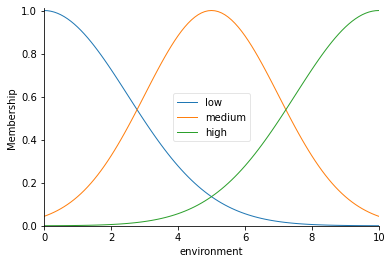

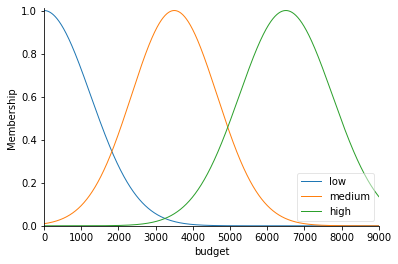

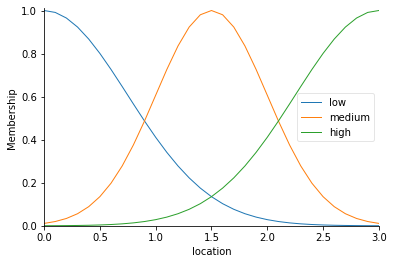

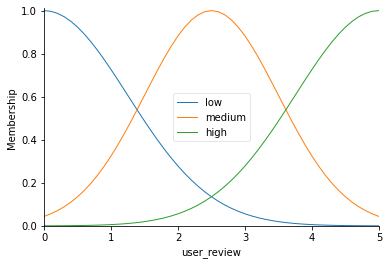

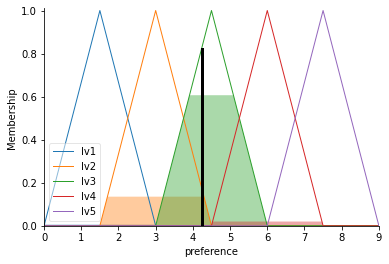

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Anteceden
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,9001,1), 'budget')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
location = ctrl.Antecedent(np.arange(0,3.1,0.1), 'location')

preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')
     

taste['low']=fuzz.gaussmf(taste.universe,0,2.5)
taste['medium']=fuzz.gaussmf(taste.universe,5,2)
taste['high']=fuzz.gaussmf(taste.universe,10,2.5)
taste.view()

environment['low']=fuzz.gaussmf(environment.universe,0,2.5)
environment['medium']=fuzz.gaussmf(environment.universe,5,2)
environment['high']=fuzz.gaussmf(environment.universe,10,2.5)
environment.view()

budget['low']=fuzz.gaussmf(budget.universe,0,1250)
budget['medium']=fuzz.gaussmf(budget.universe,3500,1150)
budget['high']=fuzz.gaussmf(budget.universe,6500,1250)
budget.view()

location['low']=fuzz.gaussmf(location.universe,0,0.75)
location['medium']=fuzz.gaussmf(location.universe,1.5,0.5)
location['high']=fuzz.gaussmf(location.universe,3,0.75)
location.view()

user_review['low']=fuzz.gaussmf(user_review.universe,0,1.25)
user_review['medium']=fuzz.gaussmf(user_review.universe,2.5,1)
user_review['high']=fuzz.gaussmf(user_review.universe,5,1.25)
user_review.view()

preference['lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])
#preference.view()
     

# các rule
rule = []

# have 'low'=1, 'medium'=2, 'high'=3
# 'lv1'~0-3, 'lv2'~3-6, 'lv3'~6-9, 'lv4'~9-12, 'lv5'~12-15
index = ['low', 'medium', 'high']
level = ['lv1','lv2','lv3','lv4','lv5']
lv=0
for i in index:
  for a in index:
    for b in index:
      for c in index:
        for d in index:
          rule.append(ctrl.Rule(taste[i]&environment[a]&budget[b]&location[c]&user_review[d], preference[level[lv]]))
          if (i == 'low') and (a =='low') and (b=='low') and (c=='low') and (d=='low'):
            lv = 1
          if (i == 'low') and (a =='low') and (b=='medium') and (c=='medium') and (d=='medium'):
            lv = 2
          if (i == 'high') and (a =='high') and (b=='medium') and (c=='medium') and (d=='medium'):
            lv = 3
          if (i == 'high') and (a =='high') and (b=='high') and (c=='high') and (d=='high'):
            lv = 4

preference_control = ctrl.ControlSystem(rule[:])
     
#simu
preferencing = ctrl.ControlSystemSimulation(preference_control)
preferencing.input['taste'] = 3
preferencing.input['environment'] = 5
preferencing.input['budget'] = 4000
preferencing.input['location'] = 1
preferencing.input['user_review'] = 1
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)

2.077777777777779


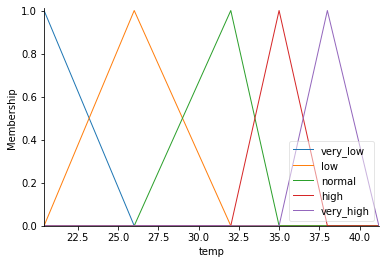

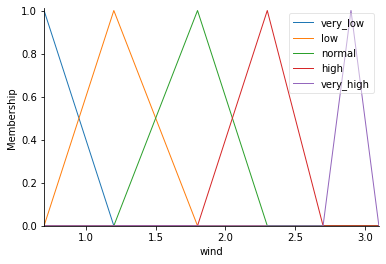

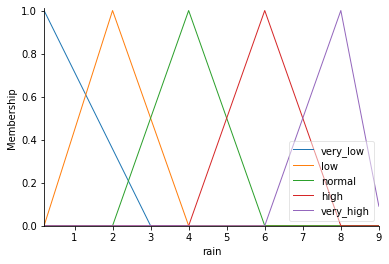

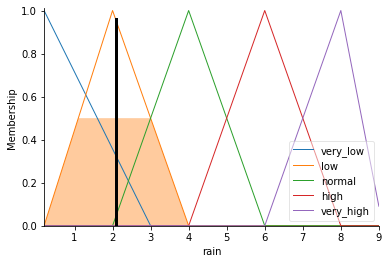

In [ ]:
# Bài 2--------------Prediction of rainfall using fuzzy logic-----------------
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
# Antecedent

temp = ctrl.Antecedent(np.arange(20.4,41.2,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,3.1,0.05),'wind')
rain = ctrl.Consequent(np.arange(0.2,9.1,0.1),'rain')

temp['very_low']=fuzz.trimf(temp.universe,[20.4,20.4,26])
temp['low']= fuzz.trimf(temp.universe,[20.4,26,32])
temp['normal']= fuzz.trimf(temp.universe,[26,32,35])
temp['high']= fuzz.trimf(temp.universe,[32,35,38])
temp['very_high']= fuzz.trimf(temp.universe,[35,38,41.2])
temp.view()

wind['very_low'] = fuzz.trimf(wind.universe, [0.7,0.7,1.2])
wind['low'] = fuzz.trimf(wind.universe, [0.7,1.2,1.8])
wind['normal'] = fuzz.trimf(wind.universe, [1.2,1.8,2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.8,2.3,2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.7,2.9,3.1])
wind.view()

rain['very_low'] = fuzz.trimf(rain.universe, [0.2,0.2,3])
rain['low'] = fuzz.trimf(rain.universe, [0.2,2,4])
rain['normal'] = fuzz.trimf(rain.universe, [2,4,6])
rain['high'] = fuzz.trimf(rain.universe, [4,6,8])
rain['very_high'] = fuzz.trimf(rain.universe, [6,8,9.1])
rain.view()

rule1 = ctrl.Rule(wind['very_low'] & temp['very_low'], rain['very_low'])
rule2 = ctrl.Rule(wind['very_low'] & temp['low'], rain['very_low'])
rule3 = ctrl.Rule(wind['very_low'] & temp['normal'], rain['low'])
rule4 = ctrl.Rule(wind['very_low'] & temp['high'], rain['low'])
rule5 = ctrl.Rule(wind['very_low'] & temp['very_high'], rain['low'])
rule6 = ctrl.Rule(wind['low'] & temp['very_low'], rain['low'])
rule7 = ctrl.Rule(wind['low'] & temp['low'], rain['low'])
rule8 = ctrl.Rule(wind['low'] & temp['normal'], rain['low'])
rule9 = ctrl.Rule(wind['low'] & temp['high'], rain['low'])
rule10 = ctrl.Rule(wind['low'] & temp['very_high'], rain['normal'])
rule11 = ctrl.Rule(wind['normal'] & temp['very_low'], rain['low'])
rule12 = ctrl.Rule(wind['normal'] & temp['low'], rain['low'])
rule13 = ctrl.Rule(wind['normal'] & temp['normal'], rain['normal'])
rule14 = ctrl.Rule(wind['normal'] & temp['high'], rain['normal'])
rule15 = ctrl.Rule(wind['normal'] & temp['very_high'], rain['normal'])
rule16 = ctrl.Rule(wind['high'] & temp['very_low'], rain['low'])
rule17 = ctrl.Rule(wind['high'] & temp['low'], rain['low'])
rule18 = ctrl.Rule(wind['high'] & temp['normal'], rain['normal'])
rule19 = ctrl.Rule(wind['high'] & temp['high'], rain['normal'])
rule20 = ctrl.Rule(wind['high'] & temp['very_high'], rain['high'])
rule21 = ctrl.Rule(wind['very_high'] & temp['very_low'], rain['low'])
rule22 = ctrl.Rule(wind['very_high'] & temp['low'], rain['normal'])
rule23 = ctrl.Rule(wind['very_high'] & temp['normal'], rain['normal'])
rule24 = ctrl.Rule(wind['very_high'] & temp['high'], rain['high'])
rule25 = ctrl.Rule(wind['very_high'] & temp['very_high'], rain['very_high'])

rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
     

#Simun
raining = ctrl.ControlSystemSimulation(rain_ctrl)
raining.input['wind'] = 1.5
raining.input['temp'] = 24.4
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)

45.0


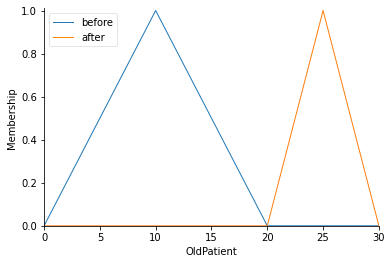

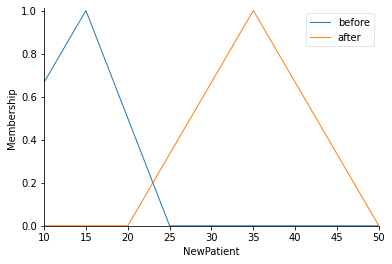

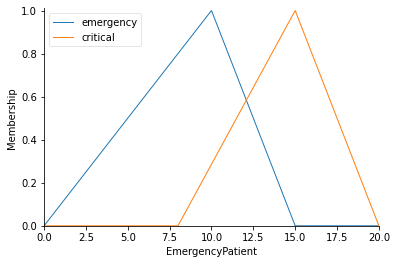

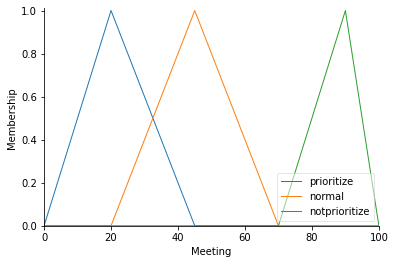

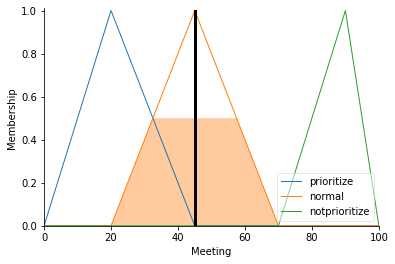

In [ ]:
#-----------Patients Management System using Fuzzy Logic: An easier and dynamic appointment system----------------

#Antecendent
OldPatient = ctrl.Antecedent(np.arange(0,31,1),'OldPatient')
NewPatient = ctrl.Antecedent(np.arange(10,51,1),'NewPatient')
EmergencyPatient = ctrl.Antecedent(np.arange(0,21,1),'EmergencyPatient')
Meeting = ctrl.Consequent(np.arange(0,101,1),'Meeting')


OldPatient['before']=fuzz.trimf(OldPatient.universe,[0,10,20])
OldPatient['after']=fuzz.trimf(OldPatient.universe,[20,25,30])
OldPatient.view()

NewPatient['before']=fuzz.trimf(NewPatient.universe,[0,15,25])
NewPatient['after']=fuzz.trimf(NewPatient.universe,[20,35,50])
NewPatient.view()

EmergencyPatient['emergency']=fuzz.trimf(EmergencyPatient.universe,[0,10,15])
EmergencyPatient['critical']=fuzz.trimf(EmergencyPatient.universe,[8,15,20])
EmergencyPatient.view()

Meeting['prioritize']=fuzz.trimf(Meeting.universe,[0,20,45])
Meeting['normal']=fuzz.trimf(Meeting.universe,[20,45,70])
Meeting['notprioritize']=fuzz.trimf(Meeting.universe,[70,90,100])
Meeting.view()


#rule
rule1=ctrl.Rule(OldPatient['before'] & NewPatient['before'] & EmergencyPatient['emergency'], Meeting['notprioritize'])
rule2=ctrl.Rule(OldPatient['before'] & NewPatient['after'] & EmergencyPatient['emergency'], Meeting['notprioritize'])
rule3=ctrl.Rule(OldPatient['after'] & NewPatient['before'] & EmergencyPatient['emergency'], Meeting['normal'])
rule4=ctrl.Rule(OldPatient['after'] & NewPatient['after'] & EmergencyPatient['emergency'], Meeting['prioritize'])

rule5=ctrl.Rule(OldPatient['before'] & NewPatient['before'] & EmergencyPatient['critical'], Meeting['normal'])
rule6=ctrl.Rule(OldPatient['before'] & NewPatient['after'] & EmergencyPatient['critical'], Meeting['prioritize'])
rule7=ctrl.Rule(OldPatient['after'] & NewPatient['before'] & EmergencyPatient['critical'], Meeting['prioritize'])
rule8=ctrl.Rule(OldPatient['after'] & NewPatient['after'] & EmergencyPatient['critical'], Meeting['prioritize'])


meeting_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
meetingsimu = ctrl.ControlSystemSimulation(meeting_ctrl)
meetingsimu.input['OldPatient']=10
meetingsimu.input['NewPatient'] = 20
meetingsimu.input['EmergencyPatient'] = 15
meetingsimu.compute()
print(meetingsimu.output['Meeting'])
Meeting.view(sim=meetingsimu)